# Customer default payment prediction

### 

### 1) Problem Statement.

**Data:** Credit card related data

**Problem Statement:**

- This study took payment data in October, 2005, from an important bank (a cash and credit card issuer) in Taiwan and the targets were credit card holders of the bank. Among the total 30,000 observations, 6,636 observations (22.12%) are the cardholders with default payment. This research employed a binary variable default payment (Yes = 1, No = 0), as the response variable.

- The focus here is to identify the person who could probably default on payment for the next month.

### Data Description:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 24 variables as explanatory variables:

**ID:** ID of each customer
**X1** or **LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**X2** or **SEX:** Gender (1 = male; 2 = female).

**X3** or **EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4** or **MARRIAGE:** Marital status (1 = married; 2 = single; 3 = others).

**X5** or **AGE:** Age (year).

**PAY_0, PAY_2 TO PAY_6:** History of past payment. 
We tracked the past monthly payment records (from April to September, 2005) as follows:
    
 - **X6** or **PAY_0** = the repayment status in September, 2005; 
 - **X7** or **PAY_2** = the repayment status in August, 2005;
 - **X8** or **PAY_3** = the repayment status in July, 2005; 
 - **X9** or **PAY_4** = the repayment status in June, 2005;
 - **X10** or **PAY_5** = the repayment status in May, 2005; 
 - **X11** or **PAY_6** = the repayment status in April, 2005. 

 The measurement scale for the repayment status is:

   - -1: Paid in full; 
   - 0: The use of revolving credit; 
   - 1 = payment delay for one month; 
   - 2 = payment delay for two months; 
   - .
   - .    
   - .   
   - 8 = payment delay for eight months; 
   - 9 = payment delay for nine months and above.
    

**BILL_AMT1 TO BILL_AMT6:** Amount of bill statement (NT dollar). 

 - **X12** or **BILL_AMT1** = amount of bill statement in September, 2005; 
 - **X13** or **BILL_AMT2** = amount of bill statement in August, 2005; 
 - **X14** or **BILL_AMT3** = amount of bill statement in July, 2005; 
 - **X15** or **BILL_AMT4** = amount of bill statement in June, 2005;          
 - **X16** or **BILL_AMT5** = amount of bill statement in May, 2005; 
 - **X17** or **BILL_AMT6** = amount of bill statement in April, 2005.


**PAY_AMT1 TO PAY_AMT6:** Amount of previous payment (NT dollar). 
 - **X18** or **PAY_AMT1** = amount paid in September, 2005; 
 - **X19** or **PAY_AMT2** = amount paid in August, 2005;
 - **X20** or **PAY_AMT3** = amount paid in July, 2005; 
 - **X21** or **PAY_AMT4** = amount paid in June, 2005;
 - **X22** or **PAY_AMT5** = amount paid in May, 2005; 
 - **X23** or **PAY_AMT6** = amount paid in April, 2005.

**y** or **default payment next month:** =0 then not default, =1 then default"

### 2) Import required libraries


In [1]:
#pip uninstall scikit-learn

In [2]:
#pip install scikit-learn==1.2.2

In [3]:

#from statistics import mean
#from sklearn.pipeline import Pipeline

#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from imblearn.combine import SMOTETomek

#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC

#from sklearn.metrics import accuracy_score, classification_report, \
#                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
#from sklearn.base import TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit#, train_test_split, GridSearchCV

import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
print("Version:")
print(sklearn.__version__)

Version:
1.2.2


### Read Data

In [5]:
#load downloaded file
INPUT_PATH = r"C:\Users\User\Desktop\portfolio\cc_defaulter_prediction\artifacts\data_ingestion\CreditCardClients.xls"
df = pd.read_excel(INPUT_PATH, header=1)

In [6]:
#check rows and columns of the dataset
df.shape

(30000, 25)

In [7]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [8]:
df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

- column PAY_0 can be renamed to PAY_1.
- EDUCATION and MARRIAGE have undocumented categories.
- The columns PAY_n have minimum values as -2(Undocumented) and a maximaum value as 8.

The presence of these errors can be addressed in two ways.
1. Deleting the rows associated with error.(with attention to the number of rows that have error and total number of rows.)
2. Correcting the attribute information.

I used <https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608> discussion board on kaggle to correct the attribute information and to create a data schema file. Any data file that does not follow this schema will be discarded as bad data.

Though the information given was helpful, but i wasn't sure the resource is reliable. This could be one of many situations where a discussion with domain expert or a colleague would help to make a choice and justify it. I shall continue EDA with schema mentioned above.

The schema after changes would be

**X3** or **EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 4,0,5,6 = others).

**X4** or **MARRIAGE:** Marital status (1 = married; 2 = single; 3 = divorce; 0 = others).


**PAY_0, PAY_2 TO PAY_6:** History of past payment. 
We tracked the past monthly payment records (from April to September, 2005) as follows:
    
 - **X6** or **PAY_0** = the repayment status in September, 2005; 
 - **X7** or **PAY_2** = the repayment status in August, 2005;
 - **X8** or **PAY_3** = the repayment status in July, 2005; 
 - **X9** or **PAY_4** = the repayment status in June, 2005;
 - **X10** or **PAY_5** = the repayment status in May, 2005; 
 - **X11** or **PAY_6** = the repayment status in April, 2005. 

 The measurement scale for the repayment status is:

   - -2: No Consumption
   - -1: Paid in full; 
   - 0: The use of revolving credit; 
   - 1 = payment delay for one month; 
   - 2 = payment delay for two months; 
   - .
   - .    
   - .   
   - 8 = payment delay for eight months; 
   - 9 = payment delay for nine months and above.


In [9]:
from collections import Counter
c = Counter(df['default payment next month'])
for cls, val in c.most_common(2):
    print ("Class = ", cls, " No. of instances = ", val, " Proportion = ", np.round(val/len(df)*100, 2), "%")


Class =  0  No. of instances =  23364  Proportion =  77.88 %
Class =  1  No. of instances =  6636  Proportion =  22.12 %


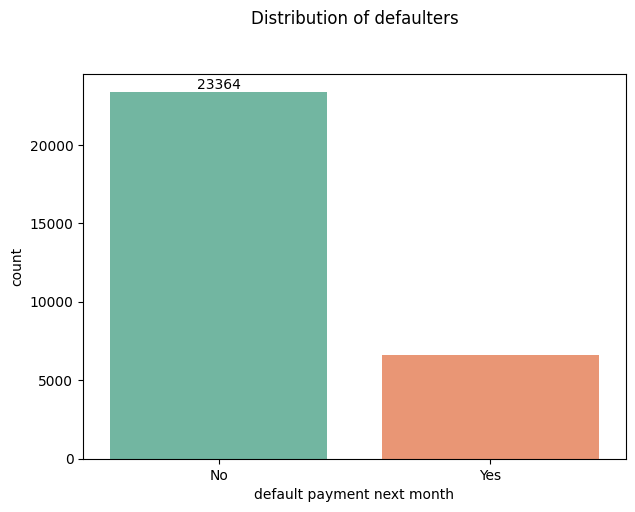

In [10]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='default payment next month', palette='Set2')
plt.title("Distribution of defaulters\n\n")
plt.xticks((0,1), labels=['No', 'Yes'])
ax.bar_label(ax.containers[0])
plt.show()

### Observation:

- The dependent feature classes are imbalanced.
- Class imbalance occures when we have skewed class proportions in dataset.
- Proportion of Minority class is 22% of the dataset.
- Since it is mild imbalanced dataset, we can try training the model on true distribution, if the model works well and generalizes, we're done. Else we can try sampling techniques.

In [11]:
#checking for null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
#checking for duplicate values
df.duplicated().sum()

0

### Observation:

1. Dataset does not contain null values.
2. No duplicate values.

In [13]:
#drop id colum
df.drop(columns='ID', inplace=True)
#rename columns for convenience
df.rename(columns = {'PAY_0': 'PAY_1', 'default payment next month': 'Default'}, inplace=True)

#lowering column names 
df.columns = [col.lower() for col in df.columns]


In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=33)
strat_train_set = None
strat_test_set = None
for train_idx, test_idx in split.split(df, df.iloc[:,-1]):
    df_train = df.loc[train_idx]
    df_test = df.loc[test_idx]
            

In [15]:
df_train.shape

(24000, 24)

In [16]:
df_test.shape

(6000, 24)

In [17]:
df_train.describe(include="all").T

count           mean            std       min       25%  \
limit_bal  24000.0  167687.903333  129974.691354   10000.0  50000.00   
sex        24000.0       1.602208       0.489452       1.0      1.00   
education  24000.0       1.856292       0.798488       0.0      1.00   
marriage   24000.0       1.550625       0.520847       0.0      1.00   
age        24000.0      35.432042       9.206171      21.0     28.00   
pay_1      24000.0      -0.018833       1.122214      -2.0     -1.00   
pay_2      24000.0      -0.135833       1.195453      -2.0     -1.00   
pay_3      24000.0      -0.168000       1.195722      -2.0     -1.00   
pay_4      24000.0      -0.220625       1.173282      -2.0     -1.00   
pay_5      24000.0      -0.264833       1.137065      -2.0     -1.00   
pay_6      24000.0      -0.291750       1.149936      -2.0     -1.00   
bill_amt1  24000.0   50993.903958   72981.995046 -165580.0   3505.25   
bill_amt2  24000.0   49023.957417   70507.581055  -67526.0   2973.25   
bill_amt3  24000.0   46955.525000   69241.834127 -157264.0   2662.75   
bill_amt4  24000.0   43222.410875   63957.601701 -170000.0   2313.00   
bill_amt5  24000.0   40258.509208   60394.189460  -53007.0   1745.75   
bill_amt6  24000.0   38812.205542   59117.498868 -209051.0   1248.00   
pay_amt1   24000.0    5728.642708   16729.536037       0.0   1000.00   
pay_amt2   24000.0    5913.115042   23015.658396       0.0    838.25   
pay_amt3   24000.0    5212.149875   16854.791251       0.0    390.00   
pay_amt4   24000.0    4849.232917   16036.747727       0.0    291.00   
pay_amt5   24000.0    4827.517292   15441.747138       0.0    250.75   
pay_amt6   24000.0    5262.717500   18055.773419       0.0    100.00   
default    24000.0       0.221208       0.415069       0.0      0.00   

                50%        75%        max  
limit_bal  140000.0  240000.00   800000.0  
sex             2.0       2.00        2.0  
education       2.0       2.00        6.0  
marriage        2.0       2.00        3.0  
age            34.0      41.00       79.0  
pay_1           0.0       0.00        8.0  
pay_2           0.0       0.00        8.0  
pay_3           0.0       0.00        8.0  
pay_4           0.0       0.00        8.0  
pay_5           0.0       0.00        8.0  
pay_6           0.0       0.00        8.0  
bill_amt1   22274.0   66868.75   630458.0  
bill_amt2   21080.5   63817.25   646770.0  
bill_amt3   19998.5   60039.00  1664089.0  
bill_amt4   18967.5   54460.50   628699.0  
bill_amt5   18072.5   50065.25   823540.0  
bill_amt6   16999.5   49104.50   699944.0  
pay_amt1     2100.0    5017.00   873552.0  
pay_amt2     2007.0    5000.00  1684259.0  
pay_amt3     1800.0    4558.25   889043.0  
pay_amt4     1500.0    4013.25   621000.0  
pay_amt5     1500.0    4016.25   426529.0  
pay_amt6     1500.0    4000.00   528666.0  
default         0.0       0.00        1.0

In [18]:
df_train.head()

limit_bal  sex  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
28021     400000    2          1         2   29     -1     -1      0      0   
13495     420000    1          2         2   39      0      0      0      0   
26687      50000    1          1         2   25      2      0      0      0   
11741     180000    1          2         1   26     -1     -1     -1     -1   
16078     300000    2          3         2   30     -2     -2     -2     -2   

       pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
28021      0  ...      26359      41627      16709     13011     10001   
13495      0  ...     173547     176980     180109      8006      7000   
26687      0  ...      49535      30358      30302      2130      1905   
11741     -1  ...        396        396        396       396       396   
16078     -2  ...          0          0          0         0         0   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  
28021      5023     20150      5082      4134        0  
13495      6000      6500      6500     10000        0  
26687      1811      1100      1100      1200        0  
11741       396       396       396       396        0  
16078         0         0         0         0        1  

[5 rows x 24 columns]

In [19]:
df_train.iloc[4,:]

limit_bal    300000
sex               2
education         3
marriage          2
age              30
pay_1            -2
pay_2            -2
pay_3            -2
pay_4            -2
pay_5            -2
pay_6            -2
bill_amt1         0
bill_amt2         0
bill_amt3         0
bill_amt4         0
bill_amt5         0
bill_amt6         0
pay_amt1          0
pay_amt2          0
pay_amt3          0
pay_amt4          0
pay_amt5          0
pay_amt6          0
default           1
Name: 16078, dtype: int64

In [20]:
categorical_features = ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in categorical_features:
    print(col, "==>", df_train[col].unique())

sex ==> [2 1]
education ==> [1 2 3 6 4 5 0]
marriage ==> [2 1 3 0]
pay_1 ==> [-1  0  2 -2  1  3  4  8  7  5  6]
pay_2 ==> [-1  0 -2  2  3  5  4  1  7  6  8]
pay_3 ==> [ 0 -1 -2  2  4  3  7  5  1  6  8]
pay_4 ==> [ 0 -1 -2  3  2  4  7  5  1  6  8]
pay_5 ==> [ 0 -1 -2  2  3  7  4  5  8  6]
pay_6 ==> [ 0 -1 -2  2  3  7  4  8  5  6]


In [21]:
#replacing feature labels for convenience
df_train.replace({'sex': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df_train.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others',5: "Others", 6: "Others",0: "Others"}}, inplace=True)
df_train.replace({'marriage' : {1 : 'Married', 2 : 'Single', 3 : 'Divorced', 0:'Others'}}, inplace = True)
df_train.replace({'default' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [22]:
def plot_ipfeature_with_target_feature(df_train, col, target_col):
    
    
    col_vc = df_train[col].value_counts(normalize=True)
    col_vc = col_vc[sorted(col_vc.index)]
    ax0_label=np.round(col_vc.values*100, 2)
    
    col_ct = pd.crosstab(df_train[col], df_train[target_col], normalize=True)
    ax1_label = np.ravel(np.round(col_ct.values*100, 2),
                         order='F')

    ax1_plabel = []
    ax0_plabel = []
    for i in ax0_label:
        ax0_plabel.append('{:.2f}%'.format(i))
    for i in ax1_label:
        ax1_plabel.append('{:.2f}%'.format(i))

    
    fig = plt.figure(figsize=(14, 5))
    ax0 = fig.add_subplot(121)
    sns.countplot(x=col, data= df_train, palette='pastel', ax=ax0, order=sorted(col_vc.index))
    for p, label in zip(ax0.patches, ax0_plabel ):
        ax0.annotate(label, (p.get_x()+0.375, p.get_height()+100))
    plt.title(f"Distribution of {col}\n\n")


    ax1 = fig.add_subplot(122)
    sns.countplot(x=col, hue=target_col, data=df_train, palette='Set3', ax=ax1, order=sorted(col_vc.index))
    for p, label in zip(ax1.patches, ax1_plabel):
        ax1.annotate(label, (p.get_x()+0.375, p.get_height()+100), rotation=90 )
    plt.title(f"{col} column distribution w.r.t default column\n\n")

    plt.show()
    
    print("Proportion of defaulters within sub-category\n")
    print(pd.crosstab(df_train[target_col], df_train[col], normalize='columns'))

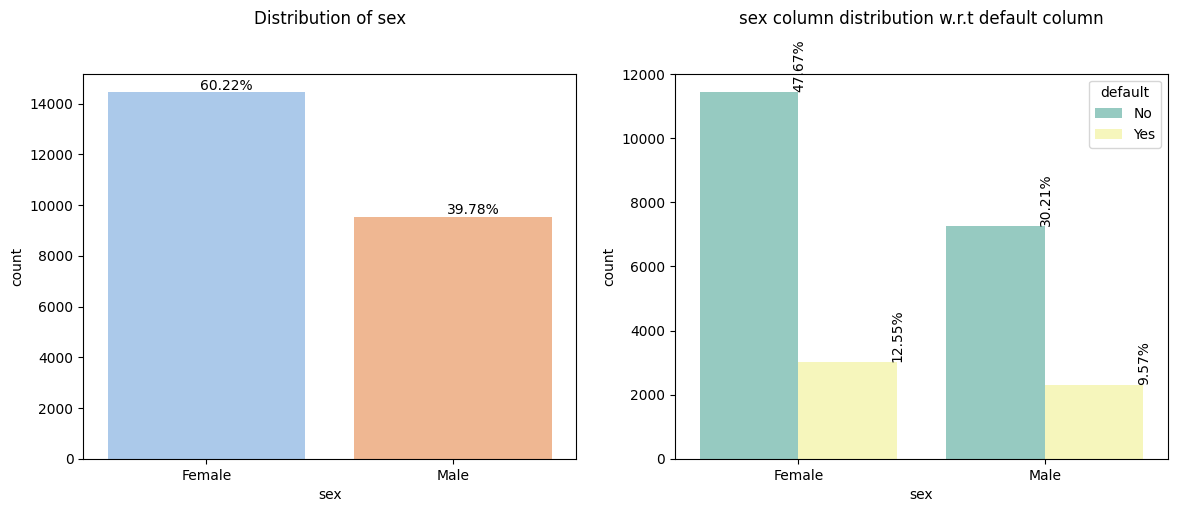

Proportion of defaulters within sub-category

sex        Female      Male
default                    
No       0.791531  0.759506
Yes      0.208469  0.240494


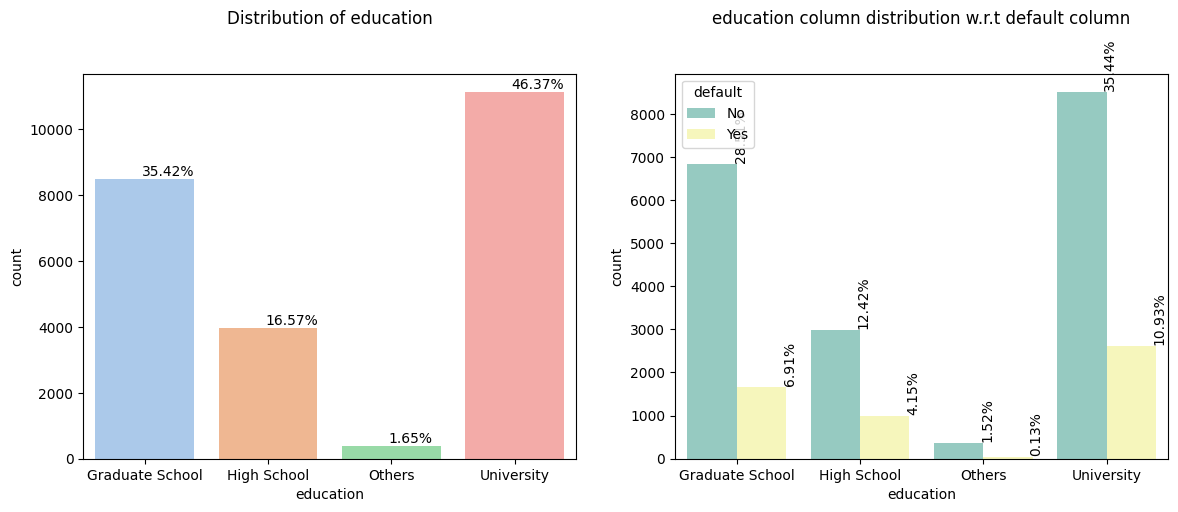

Proportion of defaulters within sub-category

education  Graduate School  High School    Others  University
default                                                      
No                0.804846     0.749497  0.921519    0.764288
Yes               0.195154     0.250503  0.078481    0.235712


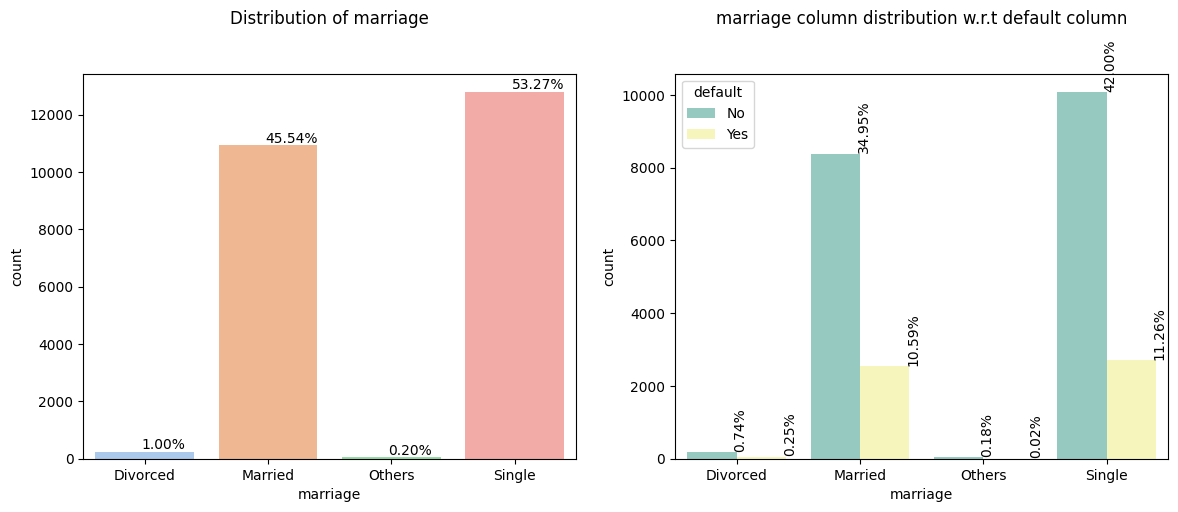

Proportion of defaulters within sub-category

marriage  Divorced   Married    Others    Single
default                                         
No         0.74477  0.767521  0.914894  0.788564
Yes        0.25523  0.232479  0.085106  0.211436


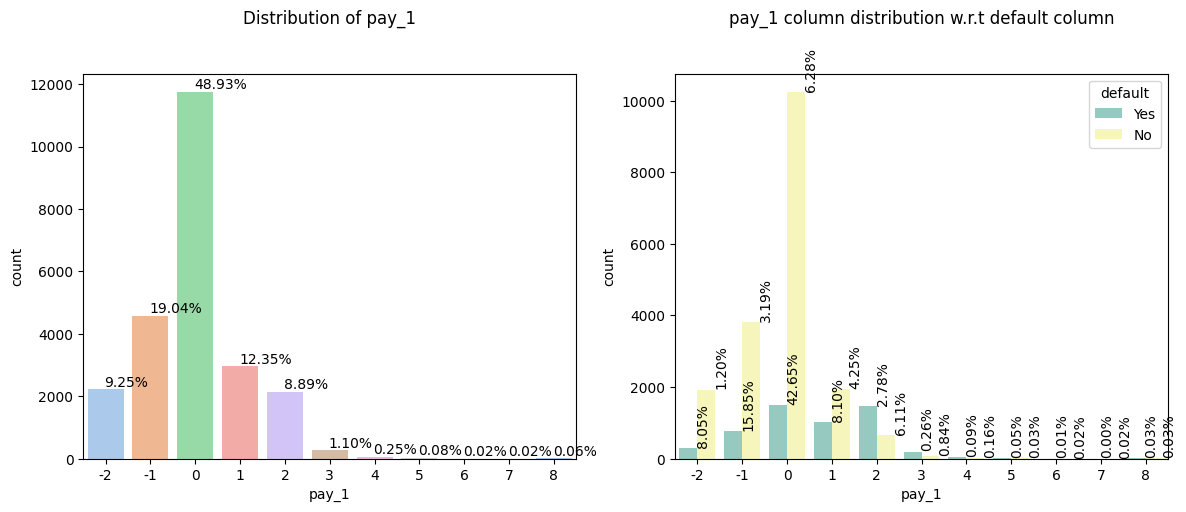

Proportion of defaulters within sub-category

pay_1          -2        -1         0         1         2         3         4  \
default                                                                         
No       0.870212  0.832604  0.871679  0.656208  0.312705  0.238636  0.355932   
Yes      0.129788  0.167396  0.128321  0.343792  0.687295  0.761364  0.644068   

pay_1      5         6         7         8  
default                                     
No       0.6  0.333333  0.166667  0.466667  
Yes      0.4  0.666667  0.833333  0.533333  


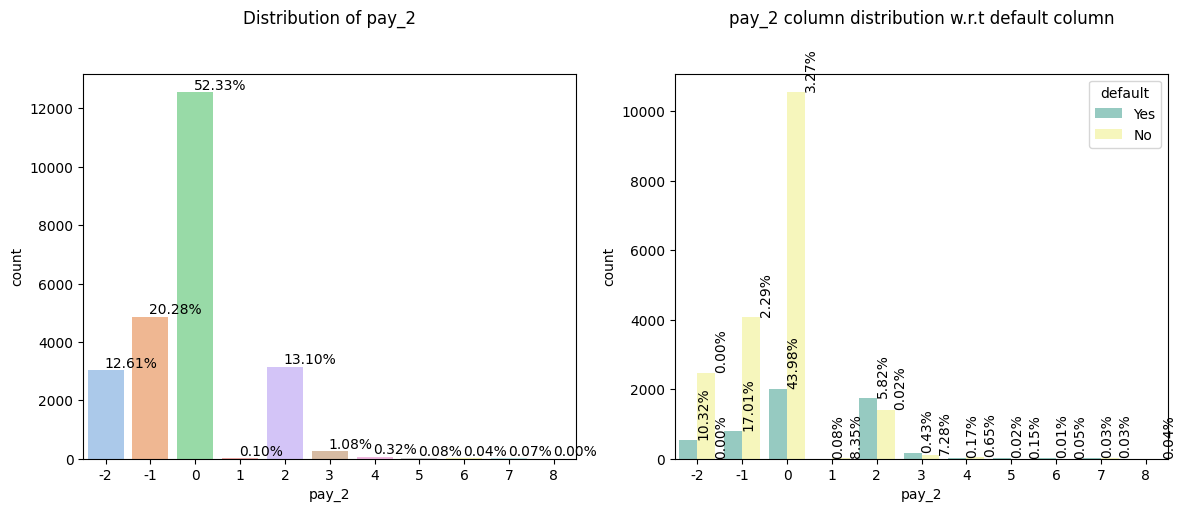

Proportion of defaulters within sub-category

pay_2          -2        -1         0    1         2         3         4  \
default                                                                    
No       0.818572  0.838882  0.840366  0.8  0.444338  0.397683  0.539474   
Yes      0.181428  0.161118  0.159634  0.2  0.555662  0.602317  0.460526   

pay_2           5         6       7    8  
default                                   
No       0.333333  0.222222  0.4375  1.0  
Yes      0.666667  0.777778  0.5625  0.0  


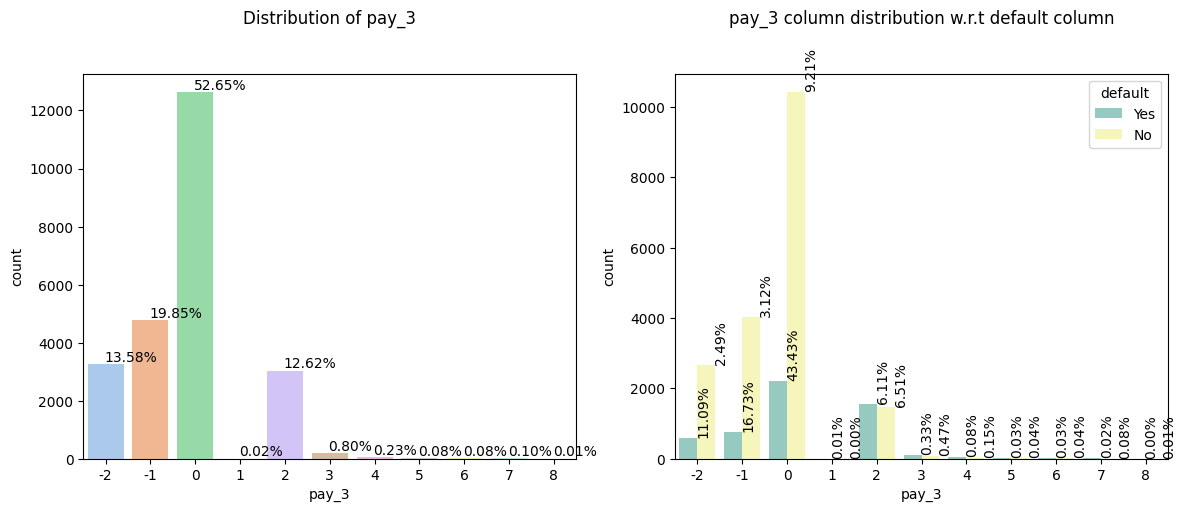

Proportion of defaulters within sub-category

pay_3          -2        -1        0     1         2         3         4  \
default                                                                    
No       0.816759  0.842779  0.82501  0.75  0.483988  0.416667  0.363636   
Yes      0.183241  0.157221  0.17499  0.25  0.516012  0.583333  0.636364   

pay_3           5         6         7         8  
default                                          
No       0.444444  0.444444  0.208333  0.333333  
Yes      0.555556  0.555556  0.791667  0.666667  


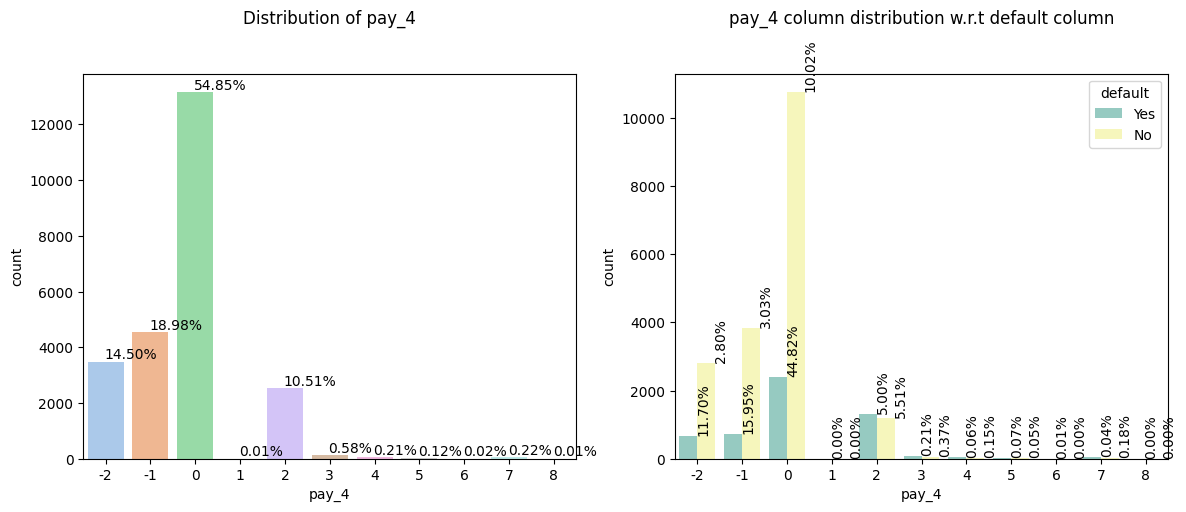

Proportion of defaulters within sub-category

pay_4          -2        -1         0    1         2         3         4  \
default                                                                    
No       0.807184  0.840176  0.817291  0.5  0.475624  0.366906  0.294118   
Yes      0.192816  0.159824  0.182709  0.5  0.524376  0.633094  0.705882   

pay_4           5     6         7    8  
default                                 
No       0.571429  0.75  0.188679  0.5  
Yes      0.428571  0.25  0.811321  0.5  


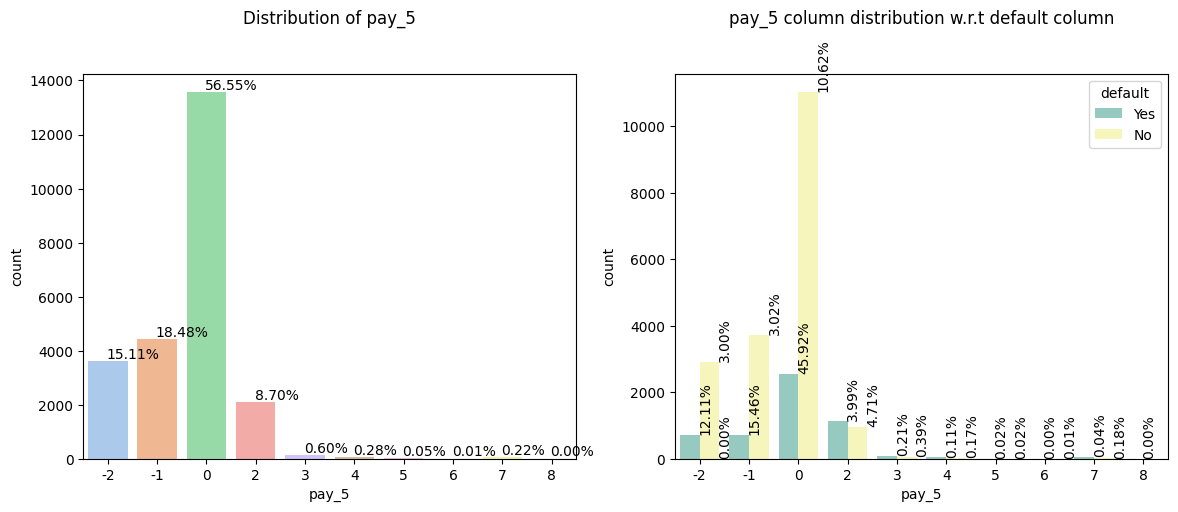

Proportion of defaulters within sub-category

pay_5         -2        -1         0         2         3         4         5  \
default                                                                        
No       0.80171  0.836528  0.812173  0.458333  0.351724  0.402985  0.545455   
Yes      0.19829  0.163472  0.187827  0.541667  0.648276  0.597015  0.454545   

pay_5           6         7    8  
default                           
No       0.333333  0.188679  0.0  
Yes      0.666667  0.811321  1.0  


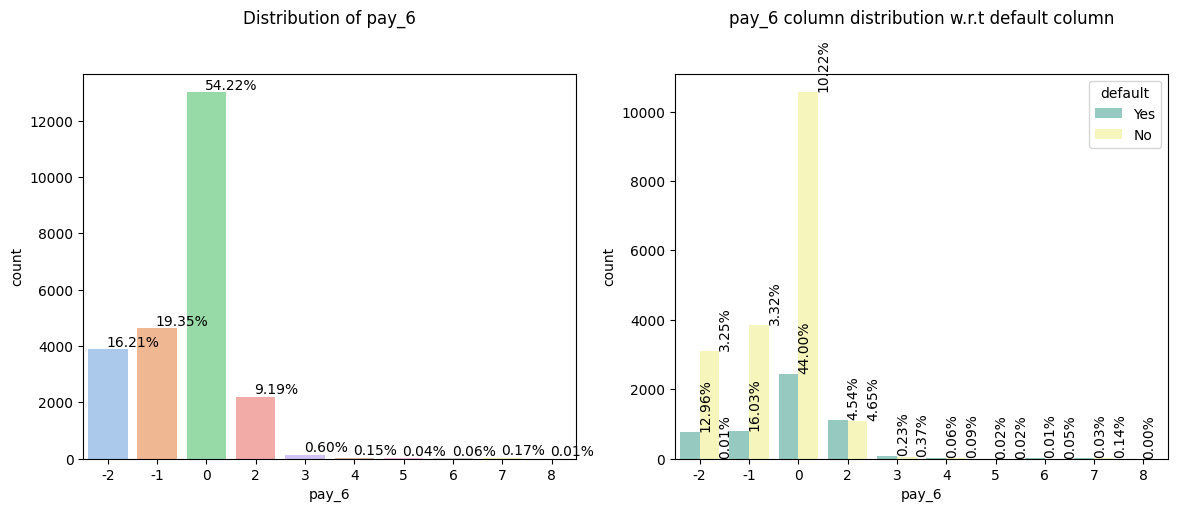

Proportion of defaulters within sub-category

pay_6         -2        -1         0         2         3         4         5  \
default                                                                        
No       0.79928  0.828559  0.811573  0.493654  0.386207  0.388889  0.444444   
Yes      0.20072  0.171441  0.188427  0.506346  0.613793  0.611111  0.555556   

pay_6           6         7    8  
default                           
No       0.142857  0.195122  0.0  
Yes      0.857143  0.804878  1.0  


In [23]:
#Is default proportion affected by gender
for col in categorical_features:
    plot_ipfeature_with_target_feature(df_train, col, 'default')

 - Although there are more female card holders, default proportion among men is more. 
 - From the given information, i cannot come to a conclusion about impact of education and marital status of a person on turning into a defaulter.
 - Customers who are using revolving credit and whose payments are delayed by two months are more likely to get default for credit card payment.

In [24]:
pay_columns = [col for col in df_train.columns[df_train.columns.str.startswith("pay_")]]
#bill_amt_columns
bill_amt_cols = [col for col in df_train.columns[df_train.columns.str.startswith("bill_amt")]]

In [25]:
#pay amount columns
pay_amt_columns = [col for col in df_train.columns[df_train.columns.str.startswith("pay_amt")]]

In [26]:
#retrieving columns pay_1 to pay_6
pay_cat_cols = [col for col in pay_columns if col not in pay_amt_columns ]

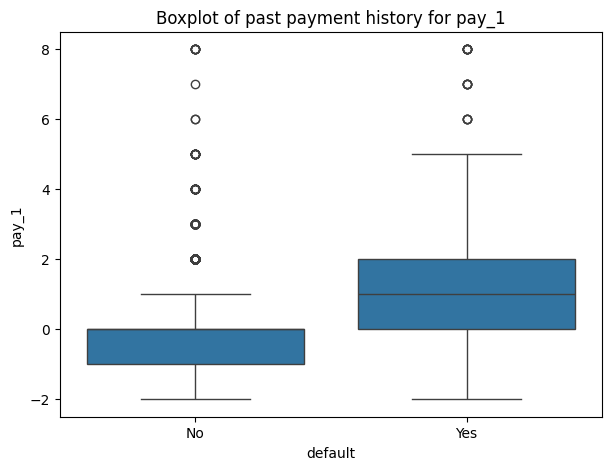

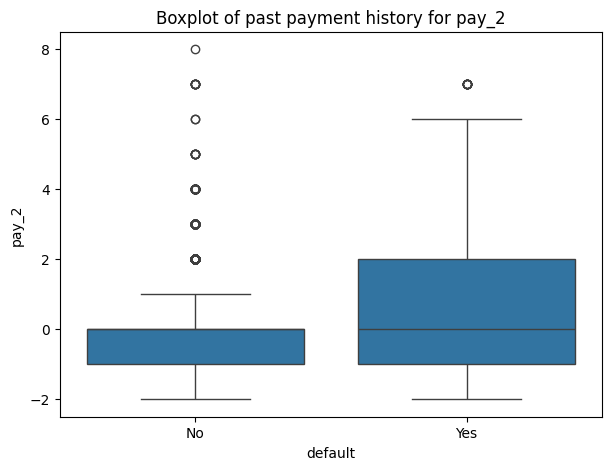

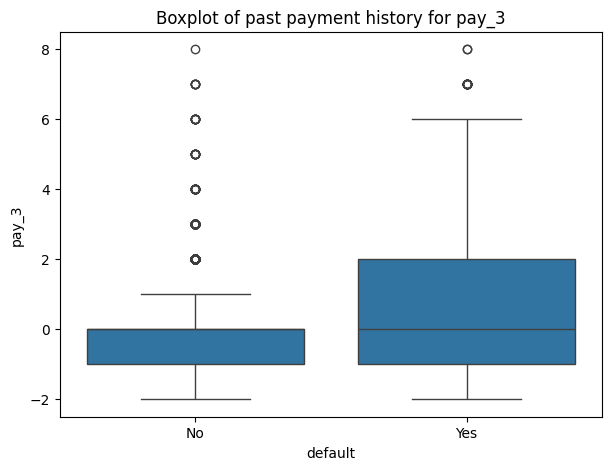

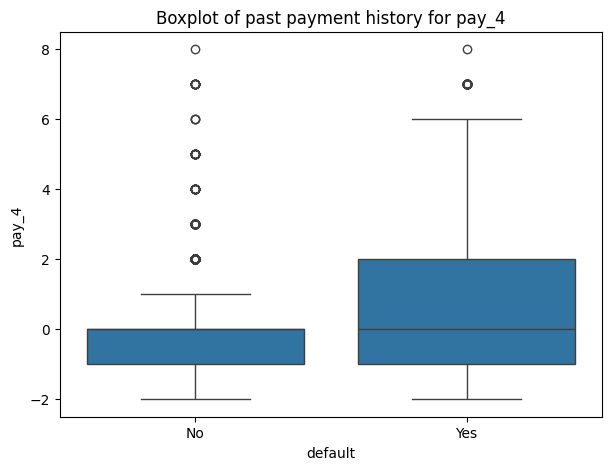

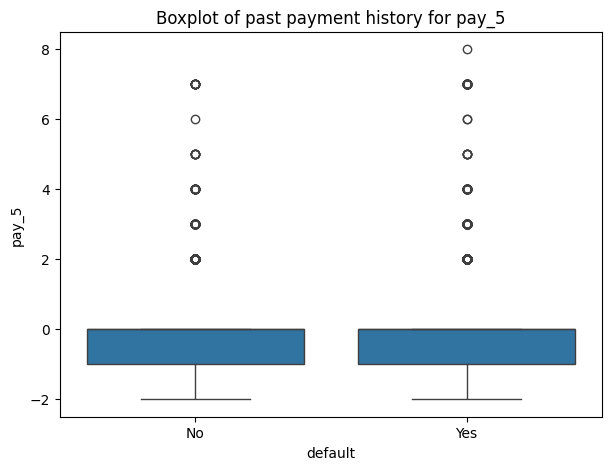

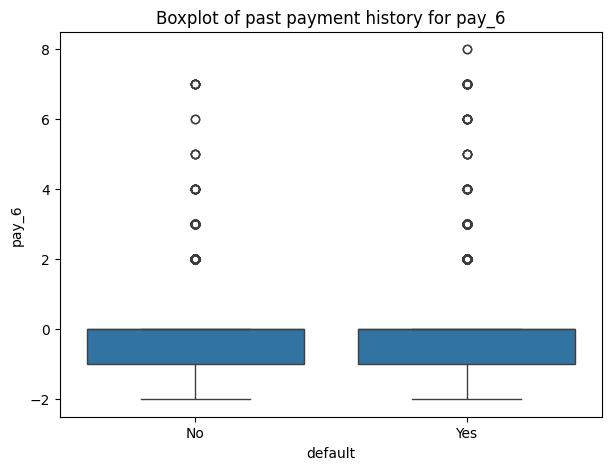

In [27]:
for i,col in enumerate(pay_cat_cols, start=1):
    plt.figure(figsize=(7,5))
    sns.boxplot(x='default', y=col, data=df_train)
    plt.title(f"Boxplot of past payment history for {col}")
    plt.show()

People using revolving credit and past payments due upto 2 months are more likely to default in payment.

In [28]:
df_train['limit_bal'].describe()

count     24000.000000
mean     167687.903333
std      129974.691354
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: limit_bal, dtype: float64

In [29]:
numeric_cols = [col for col in df_train.columns if col not in categorical_features]
numeric_cols.remove('default')
#print(numeric_cols)

The standard deviation is very high for limit balance, we can further investigate it using density plot.

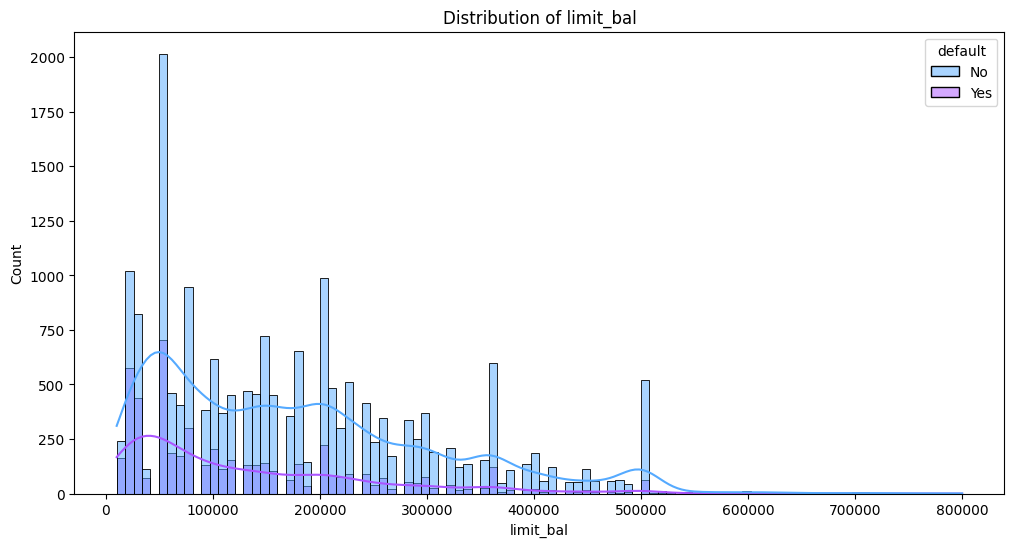

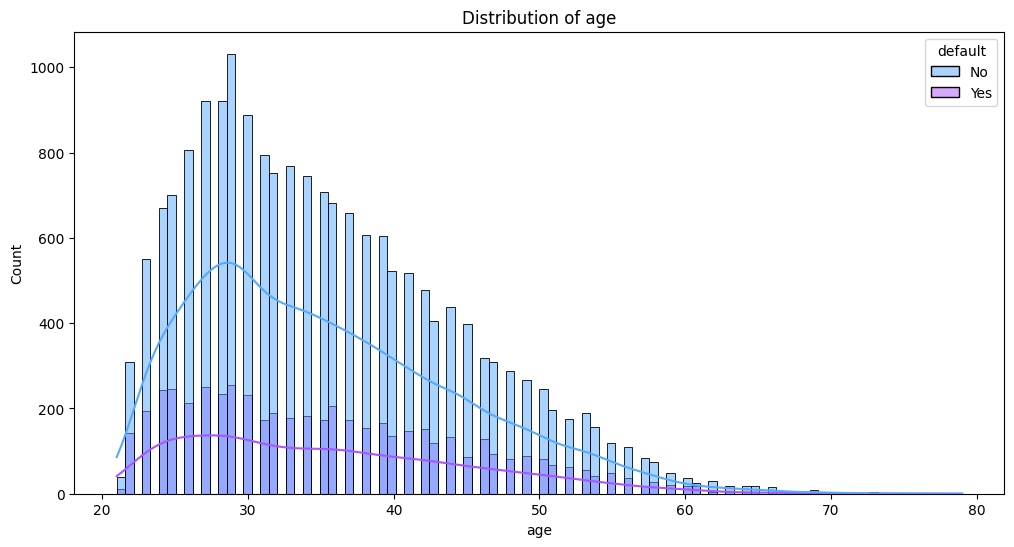

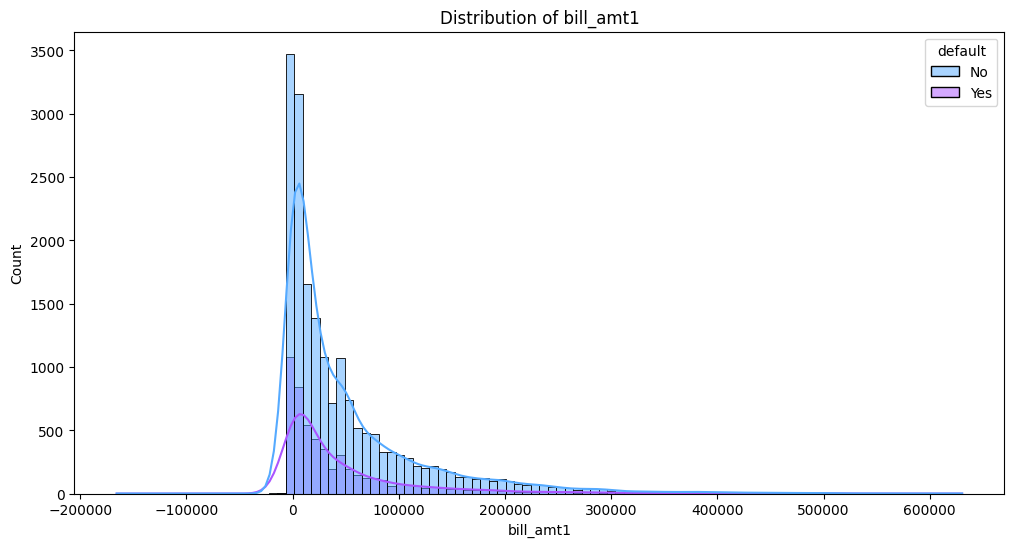

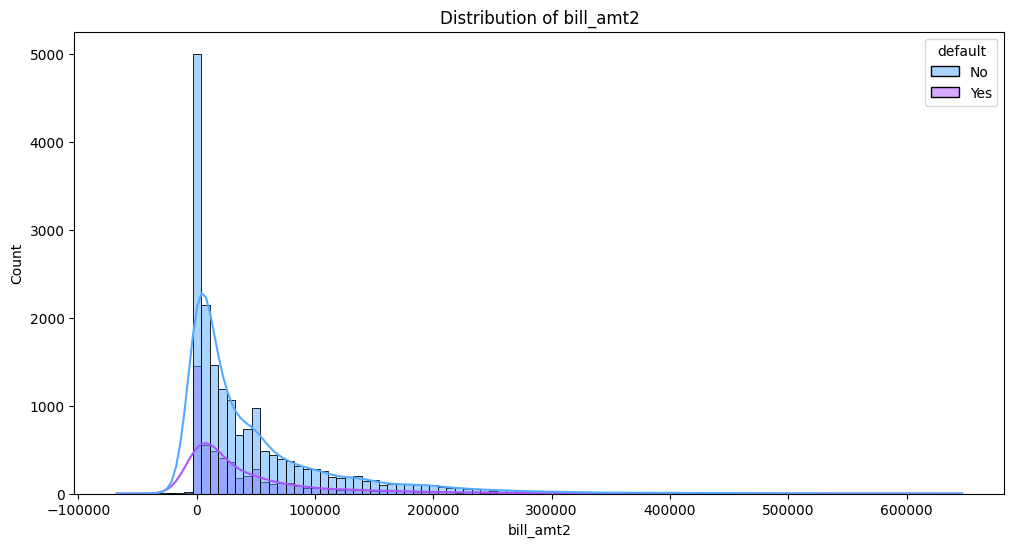

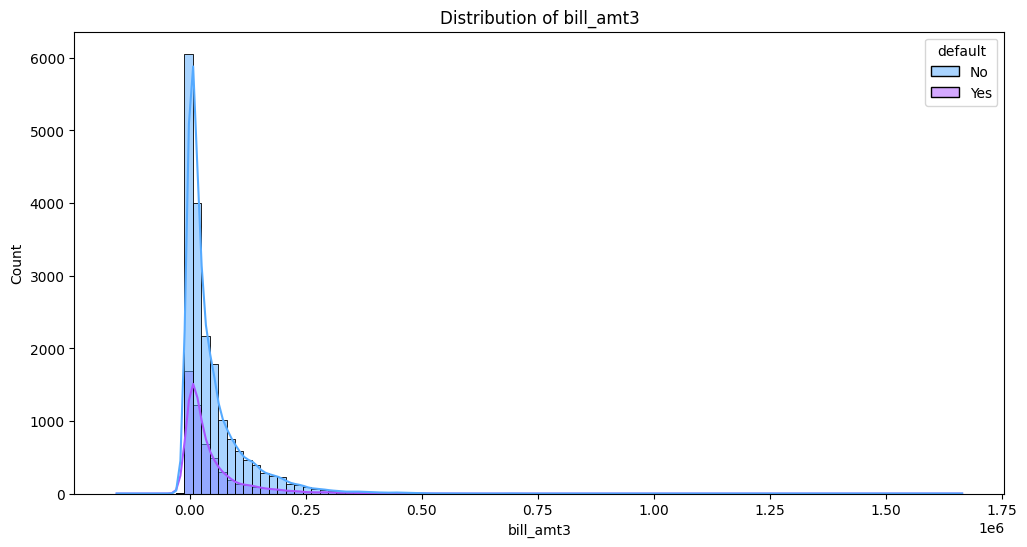

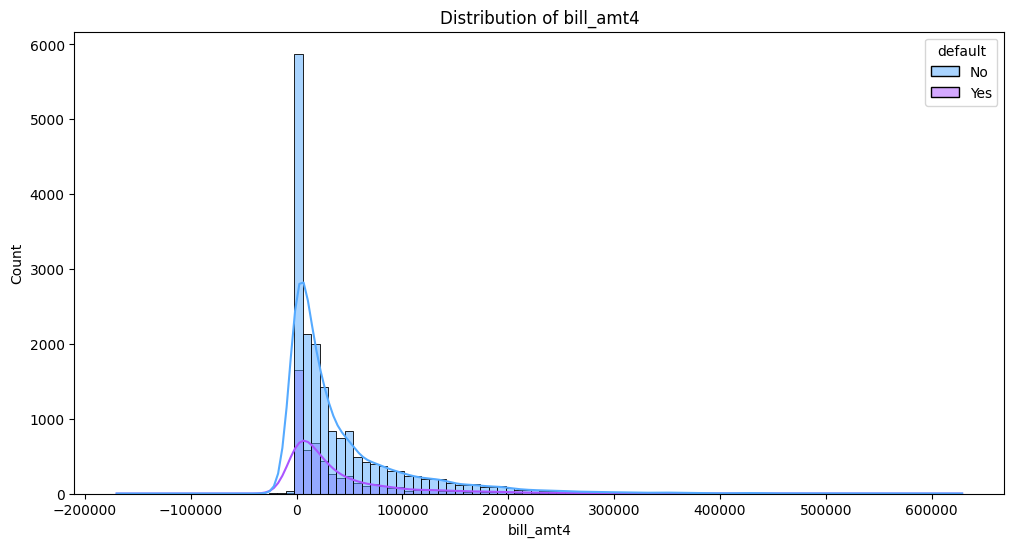

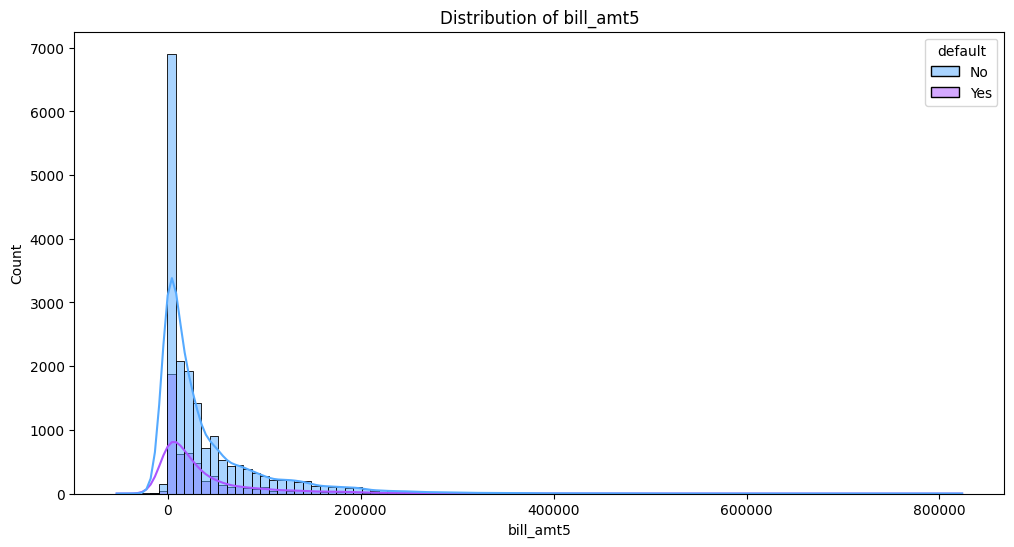

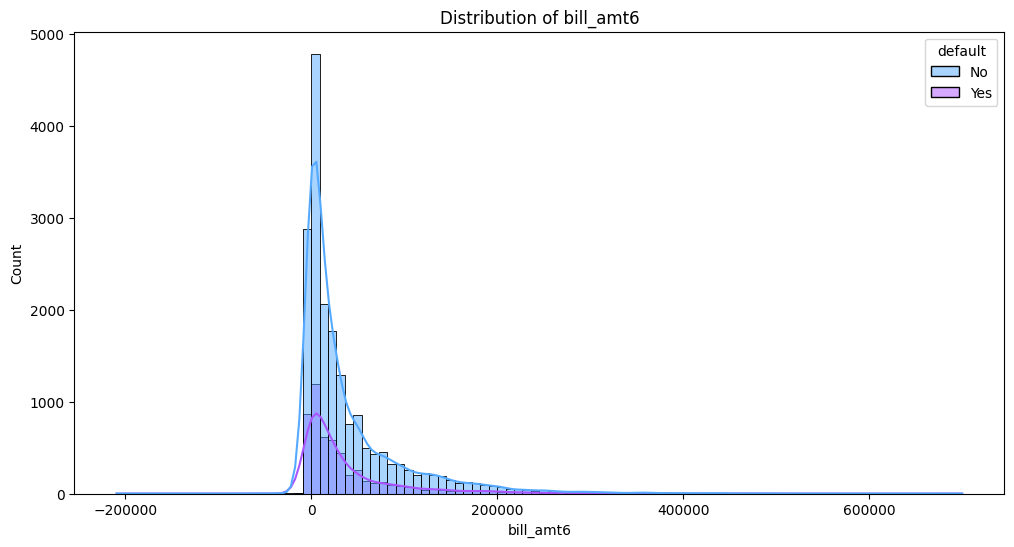

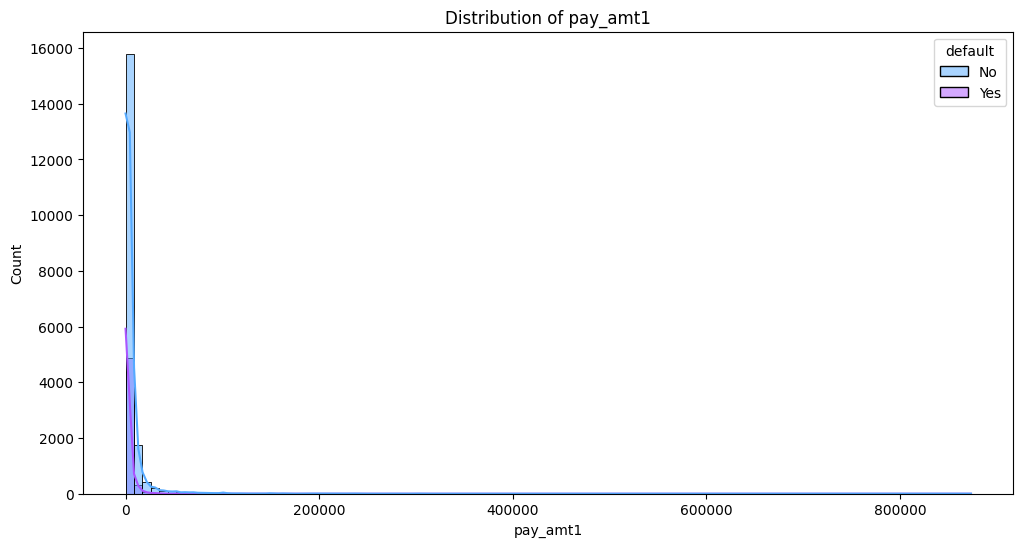

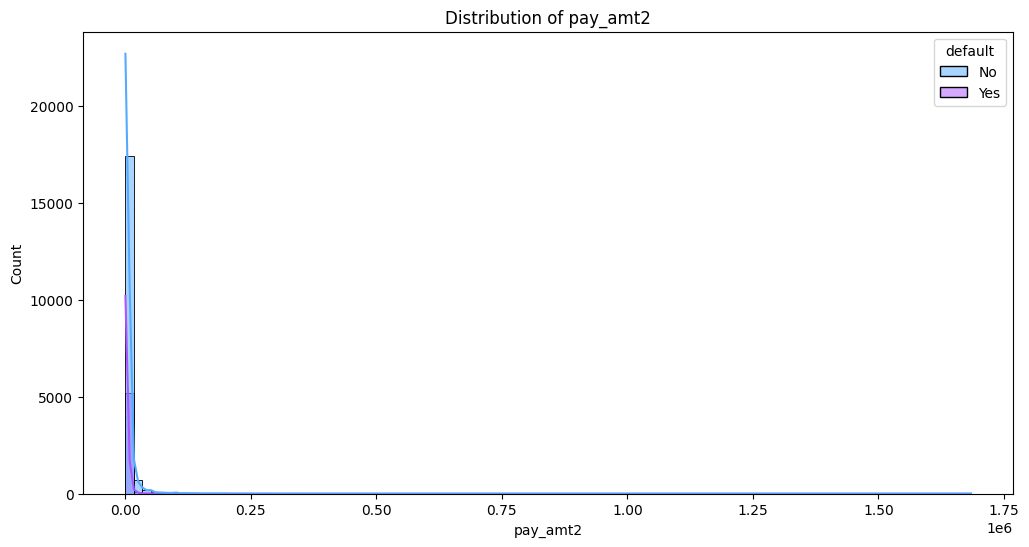

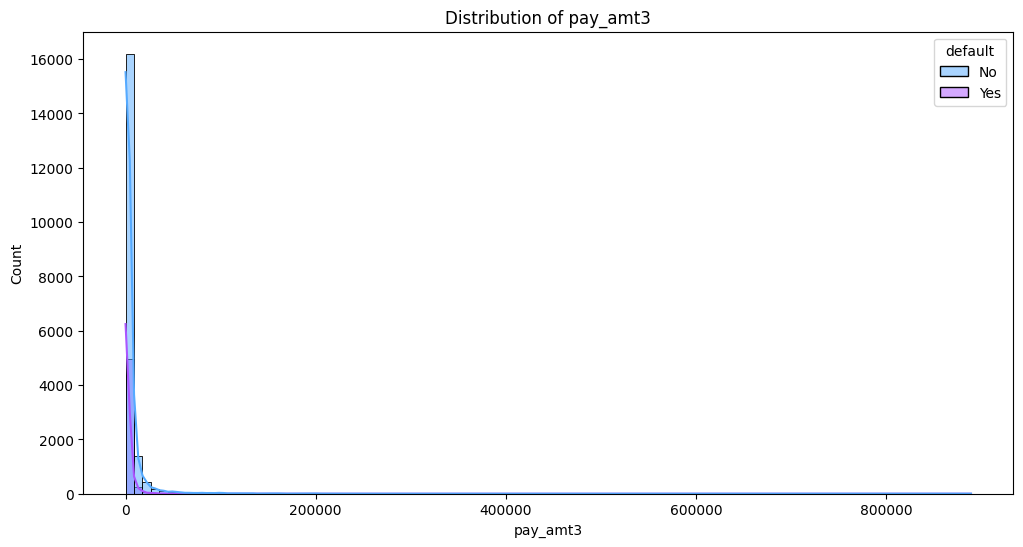

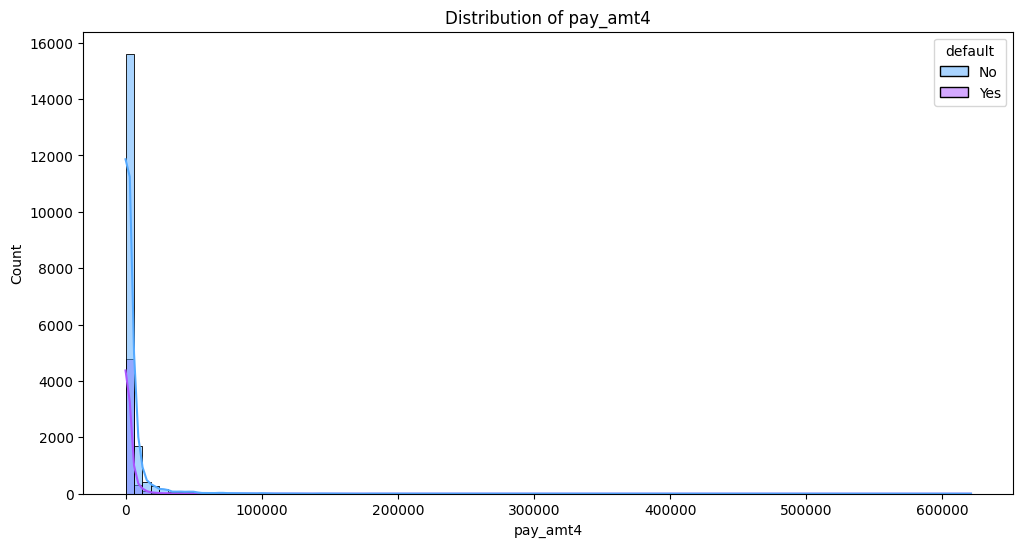

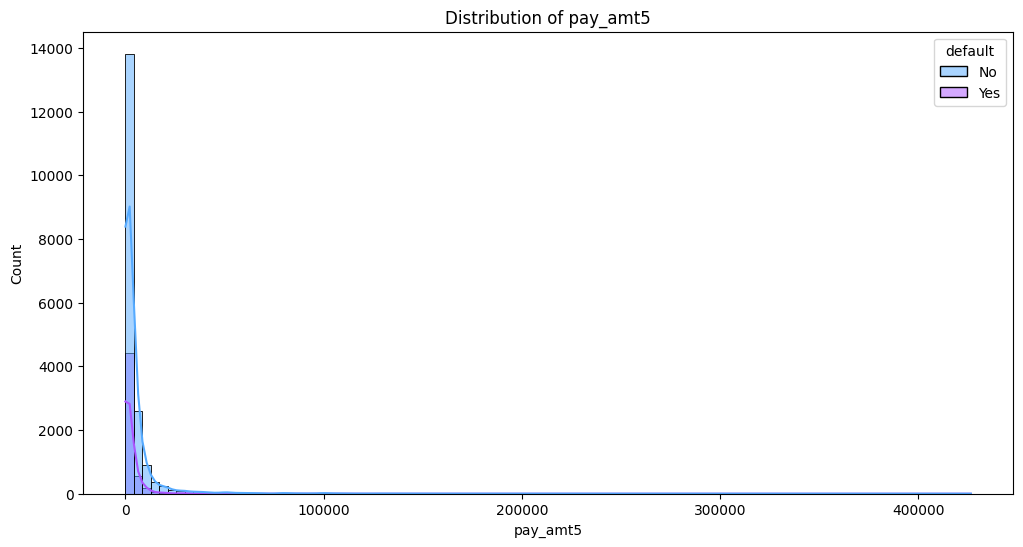

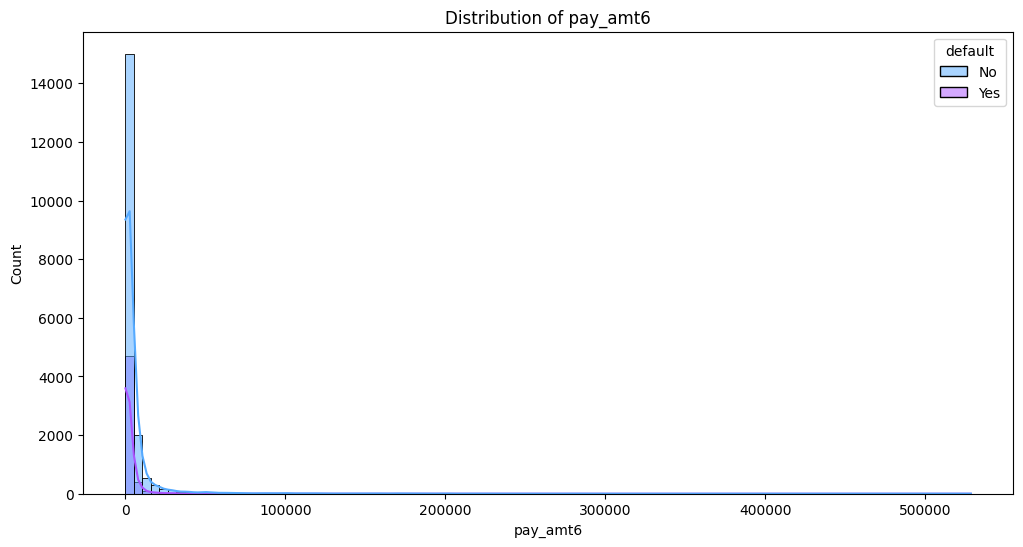

In [30]:
#print(numeric_cols)
#Checking distribution of limit balance
for col in numeric_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df_train, x=col,hue='default', kde=True, bins=100, palette='cool')
    plt.xlabel(f"{col}")
    plt.title(f"Distribution of {col}")


It can be seen that, 
- most of defaults are for credit limits 0-100000. People with higher credit limits have significantly lower default proportion.
- features are not normally distributed.
- Transformation of data is not of prime importance since it's a classification problem.

Since numerical columns are in different scales and with the presence of outliers i chose to use robust scaler to scale the data.

### Correlation among features

Correlation between features can affect performance of classification. 

In [39]:
def detect_outliers_iqr(data):
    outlier_iqr=[]
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    
    iqr = quartile_3 - quartile_1
    
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    
    for i in data:
        if (i<lower_bound) or (i>upper_bound):
            outlier_iqr.append(i)
    
    return outlier_iqr

In [45]:
for col in numeric_cols:
    print(col)
    print(detect_outliers_iqr(df_train[col]))
    #print(len(detect_outliers_iqr(df_train[col])))

limit_bal
[580000, 650000, 570000, 640000, 550000, 550000, 640000, 630000, 680000, 640000, 780000, 700000, 550000, 600000, 550000, 610000, 620000, 710000, 640000, 560000, 560000, 610000, 600000, 530000, 630000, 700000, 580000, 530000, 590000, 560000, 600000, 710000, 600000, 580000, 620000, 690000, 700000, 570000, 710000, 550000, 670000, 580000, 550000, 600000, 540000, 610000, 600000, 780000, 530000, 600000, 610000, 560000, 570000, 620000, 700000, 560000, 600000, 610000, 620000, 590000, 600000, 740000, 550000, 550000, 590000, 600000, 530000, 550000, 620000, 550000, 700000, 540000, 530000, 710000, 550000, 570000, 600000, 720000, 640000, 530000, 590000, 550000, 630000, 710000, 660000, 600000, 630000, 530000, 610000, 530000, 710000, 660000, 530000, 620000, 730000, 670000, 720000, 580000, 580000, 630000, 590000, 550000, 590000, 600000, 560000, 620000, 560000, 600000, 620000, 580000, 750000, 540000, 680000, 540000, 800000, 550000, 720000, 550000, 670000, 800000, 610000, 570000, 540000, 64000

[20150, 10968, 31074, 12000, 20000, 20750, 23850, 45049, 10000, 32132, 10382, 19425, 10700, 9942, 10500, 9828, 10000, 11500, 10000, 24637, 24672, 30000, 20988, 10834, 18293, 9737, 10011, 37000, 20000, 11560, 10000, 23381, 280695, 14589, 18785, 47700, 13500, 9747, 19777, 20000, 42195, 71852, 20000, 17000, 12806, 10491, 115440, 20500, 19000, 53248, 22285, 12000, 10516, 45000, 9757, 53036, 10000, 10253, 10000, 30000, 70063, 46506, 11677, 20000, 140597, 21000, 23760, 20000, 40000, 10774, 110000, 71340, 15655, 27761, 11803, 10251, 10000, 10000, 10000, 61751, 30000, 30227, 15414, 20000, 50091, 10021, 12000, 11098, 15120, 15000, 42000, 11781, 41417, 16000, 15352, 148192, 10030, 10607, 10000, 15000, 24860, 28000, 49587, 10000, 11000, 11000, 14725, 35000, 10800, 40282, 10067, 35292, 9629, 292462, 33766, 15000, 10000, 12000, 15000, 91983, 13489, 10540, 45568, 80000, 30000, 27916, 10214, 12766, 27070, 15000, 109332, 14500, 10000, 14079, 10000, 10000, 10000, 30615, 31000, 100000, 11533, 104590, 14

In [31]:
df.head()

limit_bal  sex  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   pay_amt4  pay_amt5  pay_amt6  default  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 24 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  30000 non-null  int64
 1   sex        30000 non-null  int64
 2   education  30000 non-null  int64
 3   marriage   30000 non-null  int64
 4   age        30000 non-null  int64
 5   pay_1      30000 non-null  int64
 6   pay_2      30000 non-null  int64
 7   pay_3      30000 non-null  int64
 8   pay_4      30000 non-null  int64
 9   pay_5      30000 non-null  int64
 10  pay_6      30000 non-null  int64
 11  bill_amt1  30000 non-null  int64
 12  bill_amt2  30000 non-null  int64
 13  bill_amt3  30000 non-null  int64
 14  bill_amt4  30000 non-null  int64
 15  bill_amt5  30000 non-null  int64
 16  bill_amt6  30000 non-null  int64
 17  pay_amt1   30000 non-null  int64
 18  pay_amt2   30000 non-null  int64
 19  pay_amt3   30000 non-null  int64
 20  pay_amt4   30000 non-null  int64
 21  pay_amt5   3

In [33]:
df_train.replace({'sex': {'Male':1, 'Female':2}}, inplace=True)
df_train.replace({'education' : {'Graduate School':1, 'University':2, 'High School':3, 'Others':0}}, inplace=True)
df_train.replace({'marriage' : {'Married':1, 'Single':2, 'Divorced':3, 'Others':0}}, inplace = True)
df_train.replace({'default' : {'Yes':1, 'No':0}}, inplace = True)

In [34]:
corr = df_train.drop(['default'], axis=1).corr()
corr

limit_bal       sex  education  marriage       age     pay_1  \
limit_bal   1.000000  0.025795  -0.245374 -0.109308  0.146773 -0.276997   
sex         0.025795  1.000000   0.008569 -0.033864 -0.093873 -0.059536   
education  -0.245374  0.008569   1.000000 -0.148782  0.180488  0.131013   
marriage   -0.109308 -0.033864  -0.148782  1.000000 -0.416122  0.023018   
age         0.146773 -0.093873   0.180488 -0.416122  1.000000 -0.041057   
pay_1      -0.276997 -0.059536   0.131013  0.023018 -0.041057  1.000000   
pay_2      -0.303013 -0.069063   0.157583  0.027574 -0.052584  0.672184   
pay_3      -0.288911 -0.065637   0.148178  0.036405 -0.056075  0.572491   
pay_4      -0.266747 -0.063149   0.139295  0.033586 -0.047408  0.534933   
pay_5      -0.248896 -0.056704   0.125426  0.034319 -0.051608  0.507268   
pay_6      -0.234089 -0.045999   0.114720  0.033775 -0.050097  0.475818   
bill_amt1   0.278211 -0.033306  -0.007212 -0.022970  0.056072  0.184517   
bill_amt2   0.271806 -0.032517  -0.008015 -0.022402  0.055743  0.186949   
bill_amt3   0.276995 -0.024010  -0.011915 -0.025564  0.054654  0.176606   
bill_amt4   0.287706 -0.023112  -0.018703 -0.022846  0.051554  0.177004   
bill_amt5   0.288634 -0.018755  -0.018343 -0.025556  0.049087  0.178973   
bill_amt6   0.284991 -0.018231  -0.012934 -0.021065  0.046673  0.174781   
pay_amt1    0.192966 -0.002290  -0.043322 -0.008937  0.033002 -0.079083   
pay_amt2    0.174307  0.004476  -0.037324 -0.010162  0.027818 -0.070033   
pay_amt3    0.205991 -0.007725  -0.057163  0.001688  0.031654 -0.074888   
pay_amt4    0.201081 -0.006350  -0.040822 -0.014636  0.022972 -0.061509   
pay_amt5    0.219808 -0.003092  -0.047868 -0.000847  0.026868 -0.063526   
pay_amt6    0.221904 -0.000991  -0.056681 -0.006989  0.025063 -0.059685   

              pay_2     pay_3     pay_4     pay_5  ...  bill_amt3  bill_amt4  \
limit_bal -0.303013 -0.288911 -0.266747 -0.248896  ...   0.276995   0.287706   
sex       -0.069063 -0.065637 -0.063149 -0.056704  ...  -0.024010  -0.023112   
education  0.157583  0.148178  0.139295  0.125426  ...  -0.011915  -0.018703   
marriage   0.027574  0.036405  0.033586  0.034319  ...  -0.025564  -0.022846   
age       -0.052584 -0.056075 -0.047408 -0.051608  ...   0.054654   0.051554   
pay_1      0.672184  0.572491  0.534933  0.507268  ...   0.176606   0.177004   
pay_2      1.000000  0.766809  0.660013  0.621011  ...   0.219534   0.219949   
pay_3      0.766809  1.000000  0.776937  0.686902  ...   0.224951   0.226495   
pay_4      0.660013  0.776937  1.000000  0.821054  ...   0.241235   0.244533   
pay_5      0.621011  0.686902  0.821054  1.000000  ...   0.239244   0.269675   
pay_6      0.573633  0.632923  0.719598  0.819492  ...   0.242440   0.267979   
bill_amt1  0.233127  0.205814  0.199945  0.203552  ...   0.888702   0.857703   
bill_amt2  0.232807  0.235594  0.223479  0.224030  ...   0.925478   0.890528   
bill_amt3  0.219534  0.224951  0.241235  0.239244  ...   1.000000   0.921604   
bill_amt4  0.219949  0.226495  0.244533  0.269675  ...   0.921604   1.000000   
bill_amt5  0.218793  0.223801  0.241378  0.267857  ...   0.880106   0.936596   
bill_amt6  0.216974  0.220439  0.236730  0.259541  ...   0.849633   0.895043   
pay_amt1  -0.082405  0.001701 -0.010083 -0.007013  ...   0.237571   0.228509   
pay_amt2  -0.062041 -0.065434 -0.001909 -0.004629  ...   0.325653   0.207981   
pay_amt3  -0.057976 -0.053504 -0.070592  0.009260  ...   0.118187   0.285445   
pay_amt4  -0.046978 -0.046862 -0.043724 -0.057962  ...   0.141385   0.126075   
pay_amt5  -0.039739 -0.038023 -0.034928 -0.034328  ...   0.177699   0.153254   
pay_amt6  -0.037677 -0.036216 -0.027566 -0.021416  ...   0.189613   0.183887   

           bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
limit_bal   0.288634   0.284991  0.192966  0.174307  0.205991  0.201081   
sex        -0.018755  -0.018231 -0.002290  0.004476 -0.007725 -0.006350   
education  -0.018343  -0.012934 -0.043322 -0.037324 -0.057163 -0

print(sns.__version__)

pip install seaborn --upgrade

Text(0.5, 1.0, 'Correlation Matrix')

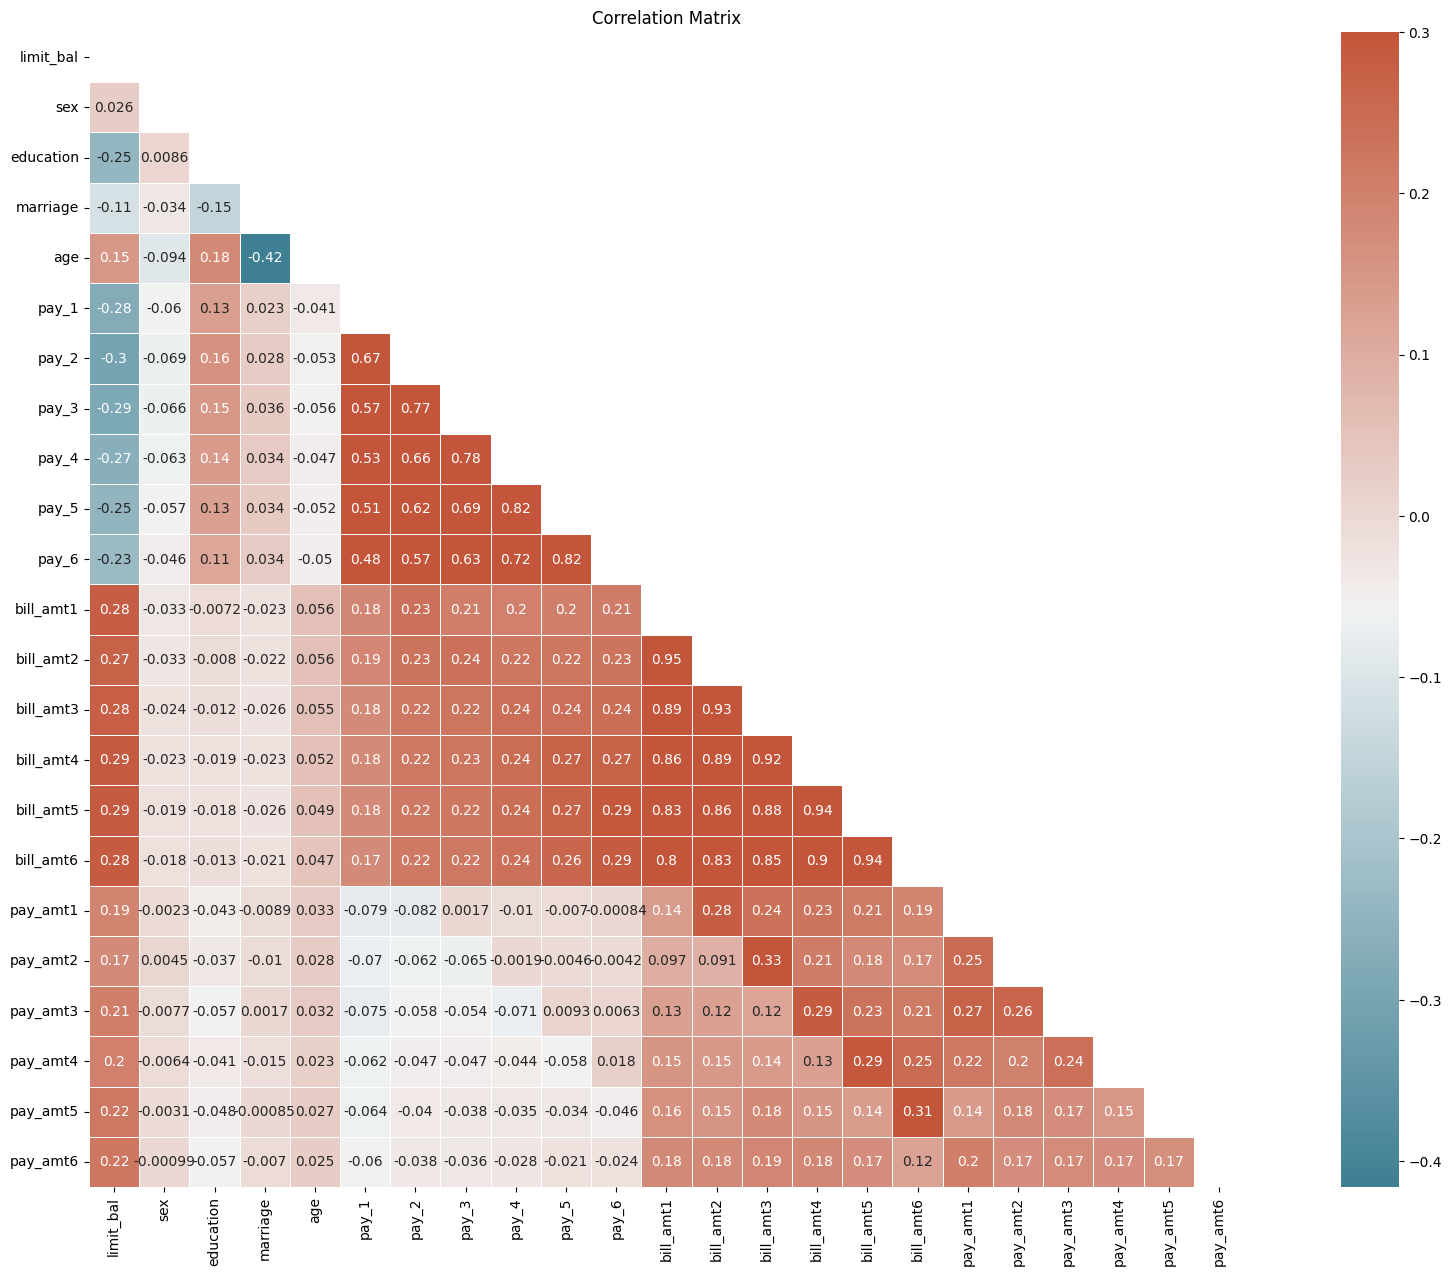

In [35]:
#Correlation matrix for all variables
corr = df_train.drop(['default'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap= cmap, linewidth=.5)
ax.set_title("Correlation Matrix")




It appears that bill amounts and past payment history are highly correlated. But not entirely dependent.

in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

Removing any of these could result in information loss.

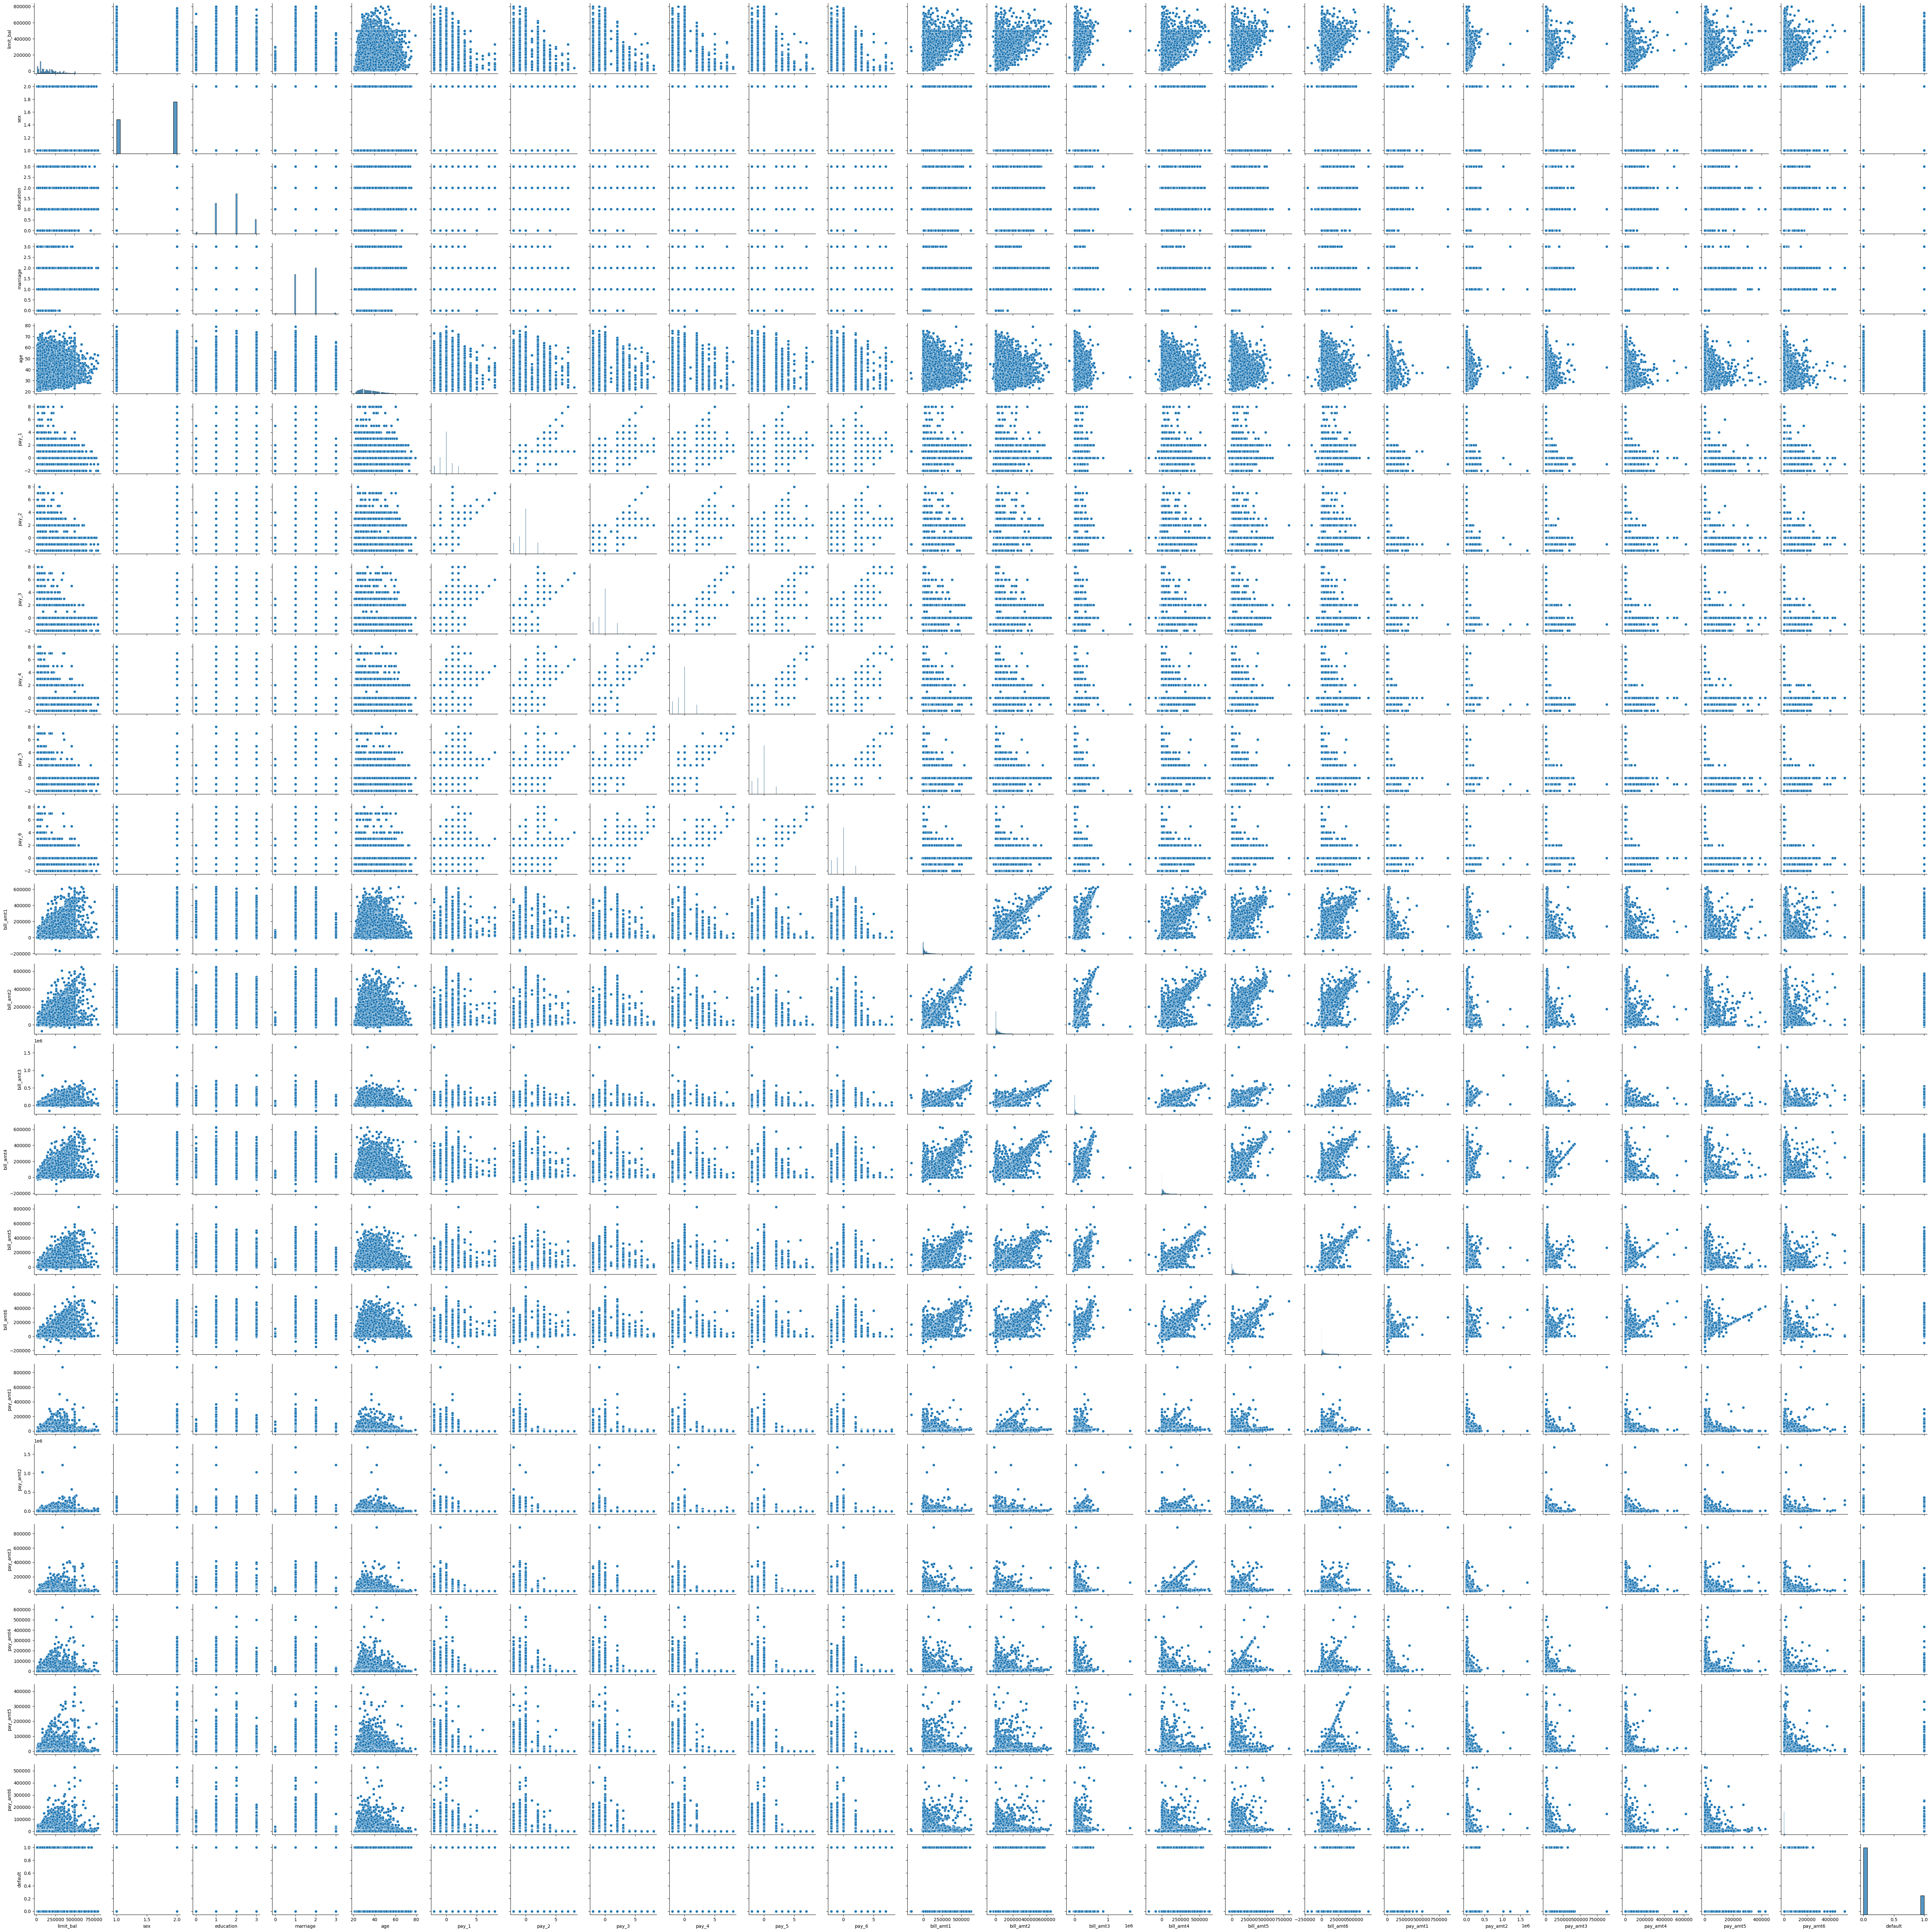

In [36]:
sns.pairplot(df_train)

#### Creating new features that might serve as better predictors

1. 'leverage' as defined by how much credit is extended to an account in terms of the set limits to borrowing.
2. 'balance carried' as defined by the multiple of billed amount to amount paid towards that balance in the prior period.

### Feature engineering and Feature selection

In [ ]:
df_train['leverage_1'] = df_train['bill_amt1']/df_train['limit_bal']   # First new feature, Leverage.
df_train['leverage_2'] = df_train['bill_amt2']/df_train['limit_bal']
df_train['leverage_3'] = df_train['bill_amt3']/df_train['limit_bal']
df_train['leverage_4'] = df_train['bill_amt4']/df_train['limit_bal']
df_train['leverage_5'] = df_train['bill_amt5']/df_train['limit_bal']
df_train['leverage_6'] = df_train['bill_amt6']/df_train['limit_bal']

df_train['bill_to_pay1'] = df_train['bill_amt1']/(df_train['pay_amt1']+1)   # Second new features, Balance-carried forward.
df_train['bill_to_pay2'] = df_train['bill_amt2']/(df_train['pay_amt2']+1)
df_train['bill_to_pay3'] = df_train['bill_amt3']/(df_train['pay_amt3']+1)
df_train['bill_to_pay4'] = df_train['bill_amt4']/(df_train['pay_amt4']+1)
df_train['bill_to_pay5'] = df_train['bill_amt5']/(df_train['pay_amt5']+1)
df_train['bill_to_pay6'] = df_train['bill_amt6']/(df_train['pay_amt6']+1)

In [ ]:
default_df = df_train[df_train['default']==1]
non_default_df = df_train[df_train['default']==0]

In [ ]:
leverage_columns=['leverage_6', 'leverage_5', 'leverage_4',
                 'leverage_3', 'leverage_2', 'leverage_1']
bill_pay_columns=['bill_to_pay5', 'bill_to_pay4', 'bill_to_pay3',
                 'bill_to_pay2', 'bill_to_pay1']
def plot_fe(cols, title):
    plt.plot(df_train[cols].mean(), label='combined' )
    plt.plot(default_df[cols].mean(), label='default' )
    plt.plot(non_default_df[cols].mean(), label='non-default' )
    plt.xticks(np.arange(6),['April','May','June','July','August','September'])
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_fe(leverage_columns, title='Monthly average leverage raios')
plot_fe(bill_pay_columns, title='Monthly average bill pay ratios')

Since SVM needs data standardization, let us standardize and onehot encode columns

In [ ]:
print(categorical_features)
numeric_features = [feature for feature in df_train.columns if not feature in categorical_features]
print(numeric_features)
#engineered_cols = ['leverage_1', 'leverage_2', 'leverage_3', 'leverage_4', 'leverage_5', 'leverage_6', 'bill_to_pay1', 'bill_to_pay2', 'bill_to_pay3', 'bill_to_pay4', 'bill_to_pay5', 'bill_to_pay6']

In [ ]:
def preprocess(df_train):
    df_train['leverage_1'] = df_train['bill_amt1']/df_train['limit_bal']   # First new feature, Leverage.
    df_train['leverage_2'] = df_train['bill_amt2']/df_train['limit_bal']
    df_train['leverage_3'] = df_train['bill_amt3']/df_train['limit_bal']
    df_train['leverage_4'] = df_train['bill_amt4']/df_train['limit_bal']
    df_train['leverage_5'] = df_train['bill_amt5']/df_train['limit_bal']
    df_train['leverage_6'] = df_train['bill_amt6']/df_train['limit_bal']

    df_train['bill_to_pay1'] = df_train['bill_amt1']/(df_train['pay_amt1']+1)   # Second new features, Balance-carried forward.
    df_train['bill_to_pay2'] = df_train['bill_amt2']/(df_train['pay_amt2']+1)
    df_train['bill_to_pay3'] = df_train['bill_amt3']/(df_train['pay_amt3']+1)
    df_train['bill_to_pay4'] = df_train['bill_amt4']/(df_train['pay_amt4']+1)
    df_train['bill_to_pay5'] = df_train['bill_amt5']/(df_train['pay_amt5']+1)
    df_train['bill_to_pay6'] = df_train['bill_amt6']/(df_train['pay_amt6']+1)


    df_train['overhead'] = np.where((df_train['bill_amt1']>df_train['limit_bal']) |
                                (df_train['bill_amt2']>df_train['limit_bal']) |
                                (df_train['bill_amt3']>df_train['limit_bal']) |
                                (df_train['bill_amt4']>df_train['limit_bal']) |
                                (df_train['bill_amt5']>df_train['limit_bal']) |
                                (df_train['bill_amt6']>df_train['limit_bal']), 1, 0) 

    df_train['avg_bill_amt'] = (df_train['bill_amt1']+df_train['bill_amt2']+df_train['bill_amt3'] \
                                       +df_train['bill_amt4']+df_train['bill_amt5']+df_train['bill_amt6'])/6
    df_train['avg_leverage_ratio'] = (df_train['bill_amt1']+df_train['bill_amt2']+df_train['bill_amt3']+df_train['bill_amt4']+ \
                                  df_train['bill_amt5']+df_train['bill_amt6'])/(6*df_train['limit_bal'])
    df_train['avg_pay_amt'] = (df_train['pay_amt1']+df_train['pay_amt2']+df_train['pay_amt3'] \
                                       +df_train['pay_amt4']+df_train['pay_amt5']+df_train['pay_amt6'])/6
    df_train['avg_bill_to_pay'] = df_train['avg_bill_amt']/(df_train['avg_pay_amt']+1)
    df_train.drop(columns=['age', 'sex','education', 'marriage'], inplace=True)
    return df_train

In [ ]:
df_train.columns

In [ ]:
df_train.head()

In [ ]:
corr = df_train.drop('default', axis=1).corr()

In [ ]:
sort = corr.abs().unstack()
sort = sort.sort_values(ascending=False)
sort[(sort>0.5) & (sort<1)]

In [ ]:
#calculate correlation of all the features with target variable
corr_pl=[]
features = df_train.drop('default', axis=1).columns.tolist()
for feat in features:
    corr_pl.append(abs(df_train['default'].corr(df_train[feat]))*100)

corrtarget_df = pd.DataFrame((features, corr_pl), index=['Features', 'Correlation']).T.sort_values(
            by = 'Correlation',ascending=False)
corrtarget_df

In [ ]:
#df_train.drop(columns=['age', 'sex','education', 'marriage'], inplace=True)
df_train = preprocess(df_train)
df_test= preprocess(df_test)

In [ ]:
df_train.columns

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
X_train = df_train.drop('default', axis=1)
y_train = df_train['default']



df_test['overhead'] = np.where((df_test['bill_amt1']>df_test['limit_bal']) |
                                (df_test['bill_amt2']>df_test['limit_bal']) |
                                (df_test['bill_amt3']>df_test['limit_bal']) |
                                (df_test['bill_amt4']>df_test['limit_bal']) |
                                (df_test['bill_amt5']>df_test['limit_bal']) |
                                (df_test['bill_amt6']>df_test['limit_bal']), 1, 0)

df_test['avg_leverage_ratio'] = (df_test['bill_amt1']+df_test['bill_amt2']+df_test['bill_amt3'] \
                                       +df_test['bill_amt4']+df_test['bill_amt5']+df_test['bill_amt6'])/(6*df_test['limit_bal'])
df_test['avg_pay_amt'] = (df_test['pay_amt1']+df_test['pay_amt2']+df_test['pay_amt3'] \
                                       +df_test['pay_amt4']+df_test['pay_amt5']+df_test['pay_amt6'])/6
 
df_test.drop(columns=['age', 'sex','education', 'marriage'], inplace=True)

In [ ]:

x_test=df_test.drop('default', axis=1)
y_test=df_test['default']

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
dt.feature_importances_

In [ ]:
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)